# Condiciones de aceptabilidad de modelos con polítropa I
## Condición C7: Criterio de estabilidad de Harrison-Zeldovich-Novikov 

Este cuaderno muestra gráficamente, para distintos valores del índice polítropo $n$ y del factor de anisotropía $C$, el cumplimiento (o no) de la condición de estabilidad de Harrison-Zeldovich-Novikov, para modelos con ecuación de estado polítropa II
\begin{equation}
    P = \kappa \rho^{1+\frac{1}{n}}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import solve_ivp
from numpy import diff

In [2]:
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
params = {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# Modelado de objetos compactos

## Ecuaciones de estructura

Las ecuaciones de estructura son el resultado de manipular las ecuaciones de campo de Einstein para una métrica y un tensor de energía dado, y son las ecuaciones que hay que resolver para modelar objetos compactos. En el caso de configuraciones estáticas con simetría esférica y anisotropía en la presión, las ecuaciones de estructura consisten en

\begin{eqnarray}
P^{\prime} &=& - \left(\rho + P \right) \frac{m + 4 \pi r^{3} P}{r(r - 2m)} + \frac{2}{r} \left(P_{\perp} - P \right)  \label{EqHid} \tag{1} \\
m^{\prime} &=& 4 \pi r^{2} \rho \label{MasDif} \tag{2}
\end{eqnarray}
donde $\rho$ es densidad de energía, $m$ es masa, $P$ es presión radial, $P_{\perp}$ es presión tangencial y la prima denota derivada respecto a $r$.

## Ecuación de Estado

Una ecuación de estado (EoS por sus siglas en inglés) es un modelo matemático, entre variables de estado, que describe los procesos físicos más importantes que ocurren en un sistema termodinámico.

La EoS polítropa I consiste en una relación tal que
\begin{equation}
P = \kappa \rho^{1+\frac{1}{n}}\,. \label{PoliII} \tag{3}
\end{equation}

Por otra parte, se supone que la anisotropía en a presión es de la forma
\begin{equation}
\Delta\equiv P_{\perp} - P = C r (\rho + P) \frac{m + 4 \pi r^3 P}{r(r-2m)} \,, \label{Anisotropia} \tag{4}
\end{equation}
tal que la ecuación (1) queda como
\begin{equation}
\frac{\mathrm{d}P}{\mathrm{d}r} = - h \frac{(\rho + P)(m + 4 \pi  r^3 P)}{r(r-2m)} \,, \label{EqHidCos} \tag{5}
\end{equation}
donde $h = 1 - 2C$, y $C$ cuantifica la anisotropía en el modelo.

## Ecuación de Lane-Emden

Las ecuaciones de estructura pueden escribirse de forma adimensional cuando son dotadas de EoS polítropas. El resultado es conocido como ecuación de Lane-Emden, dada por el cambio de variables
\begin{equation}
\psi^{n} \left(\xi \right) = \frac{\rho}{\rho_{c}} \ , \ \ \eta \left(\xi \right) = \frac{m}{4 \pi \rho_c a^{3}} \quad \textrm{y} \quad r = a\xi \,,
\end{equation}
donde
\begin{equation}
a^{2} = \frac{\sigma \left(n + 1 \right)}{4 \pi \rho_c} \quad \textrm{y} \quad \sigma = \frac{P_{c}}{\rho_{c}}  \,.
\end{equation}
El subíndice $c$ indica que la variable es evaluada en el centro de la configuración.

De esta manera, las EoS $\eqref{PoliII}$ y $\eqref{Anisotropia}$ adimensionales son
\begin{eqnarray}
P &=& \kappa \rho_{c}^{1 + \frac{1}{n}} \psi^{n+1} =  P_c \psi^{n+1} \quad \textrm{y} \label{PAdi} \tag{6} \\
\Delta &=& \frac{C (n+1) \left(\eta + \sigma \xi^{3} \psi^{n+1} \right)}{\xi - 2 \sigma (n+1)  \eta} (\psi^{n} + \sigma \psi^{n+1}) P_{c} \,, \label{AniAdi} \tag{7}
\end{eqnarray}
respectivamente. De donde es claro que $\sigma = \kappa \rho_{c}^{1/n}$.


Finalmente, las ecuaciones $\eqref{EqHidCos}$ y $\eqref{MasDif}$, escritas en su forma adimensional, son
\begin{eqnarray}
\dot{\psi} &=& - \frac{h(\eta + \sigma \xi^{3} \psi^{n+1})(1 + \sigma \psi)}{\xi \left\{\xi - 2 \sigma (n+1) \eta \right\}} \label{PsiPunto} \tag{8} \qquad \textrm{y} \\
\dot{\eta} &=& \xi^{2}\psi^{n} \label{EtaPunto} \tag{9} \,,
\end{eqnarray}
donde el punto indica derivada respecto de $\xi$.

Por lo tanto, el sistema de ecuaciones a integrar numéricamente está dado por $\eqref{PsiPunto}$ y $\eqref{EtaPunto}$, con condiciones iniciales
\begin{equation}
\psi (\xi = 0) = \psi_{c} = 1 \,, \quad \eta (\xi = 0) = \eta_{c} = 0  \,,
\end{equation}
y con condición de frontera
\begin{equation}
\psi(\xi = \xi_{b}) = 0 \,.
\end{equation}

In [3]:
# Definiendo sistema de ecuaciones: derivada de Psi y derivada de Eta en función de xi
def funciones(xi,y, sigma, n, h):
    psi_, eta_ = y
    dydxi = [-h*(eta_ + sigma*xi**(3)*psi_**(n+1))*(1 + sigma*psi_)/xi/(xi - 2*(n+1)*sigma*eta_)
             ,xi**(2)*psi_**(n)]
    return dydxi

In [4]:
c = 2.997*10**(8)          # Velocidad de la luz en S.I.
G = 6.673*10**(-11)        # Constante de gravitación universal en S.I.
Msun = 1.989*10**(30)      # Masa solar en S.I.

In [5]:
# Se definen los parámetros (de entrada) para obtener M y R 

Lista_n = [0.5,1.0,1.5,2.0,2.5,3.0]  # Lista de índices polítropos n

Lista_C = [0.0,0.0625,0.125,0.1875,0.25]     # Lista de factores de anisotropía C

sigma_m = 0.2  # Sigma del modelo a evaluar, el cual fija a kappa

rho_c = 1.5*10**(18)  # Densidad central del modelo a evaluar, el cual fija a kappa

# Sigma = Presión central entre Densidad central
sigma_inicial = 0.1                  
sigma_final = 0.9
PasoSigma = 0.025
NumSigma = round((PasoSigma + sigma_final - sigma_inicial)/PasoSigma)
Lista_sigma = np.linspace(sigma_inicial,sigma_final,NumSigma) # Lista de sigmas para obtener la variación de densidad central

In [6]:
Lista_M = []       # Contenedor para las Masas totales
Lista_R = []       # Contenedor para los Radios totales
Lista_Rho_c = []   # Contenedor para las densidades centrales
Lista_sigma_m = [] # Contenedor para los sigmas

# Contenedores para todas las soluciones
for i in range(len(Lista_n)):
    
    Lista_M.append([])
    Lista_R.append([])
    Lista_Rho_c.append([])
    Lista_sigma_m.append([])
    
    for j in range(len(Lista_C)):
        
        Lista_M[i].append([])
        Lista_R[i].append([])
        Lista_Rho_c[i].append([])
        Lista_sigma_m[i].append([])

La masa total (en unidad de masa solar) y el radio total (en kilómetros) están dados por
\begin{equation}
M = \left\{\frac{c^{2}(n+1)}{(4 \pi)^{\frac{1}{3}} G} \right\}^{\frac{3}{2}} \left(\frac{\kappa}{c^{2}} \right)^{\frac{n}{2}} \sigma^{\frac{3-n}{2}} \eta_{b} \,, \quad R = \left\{\frac{c^{2}(n+1)}{4 \pi G} \right\}^{\frac{1}{2}} \left(\frac{\kappa}{c^{2}} \right)^{\frac{n}{2}} \sigma^{\frac{1-n}{2}} \xi_{b} \,,
\end{equation}
respectivamente.

In [7]:
%%time

for i in range(len(Lista_n)):
    
    n = Lista_n[i]   # Índice polítropo n
    
    K = sigma_m*c**(2)/rho_c**(1/n)     # kappa del modelo a evaluar
    
    for j in range(len(Lista_C)):
        
        C = Lista_C[j]  # Factor de anisotropía C
        
        h = 1 - 2*C
        
        for k in range(len(Lista_sigma)): 
        
            sigma = Lista_sigma[k]
            
            rho_cen = (c**(2)*sigma/K)**(n)/1000    # Densidad central de cada modelo
            
            # Condiciones iniciales
            Psi0 = 1.0
            Eta0 = 0.0
            y0 = [Psi0,Eta0]
            
            # Intervalo de integración
            xi0 = 10**(-15) # Inicio
            ximax = 1000   # Fin, en caso de que la condición para detener la integración no se cumpla
            xi_span = (xi0,ximax) # Espacio de integración
            
            # Condición para detener la integración (Presión adimensional menor que 10**(-15))
            def stop_condition(xi,y,sigma,n,h):
                return y[0] - 10**(-15)
            stop_condition.terminal = True
            
            # Solución del sistema de ecuaciones utilizando la rutina "solve_ivp" por medio del método RK45
            # solve_ivp(Ecuaciones a integrar, Espacio de integración, Condiciones iniciales, Método de integración,
            #           Condición para detener la integración)
            soluciones = solve_ivp(funciones,xi_span,y0,method='RK45',events=stop_condition,
                                   args=(sigma,n,h),max_step=1/20)
            
            if soluciones.status != 0:
                xi = soluciones.t
                Psi = soluciones.y[0]
                Eta = soluciones.y[1]
            else:
                print('Modelo sin borde. Parámetros: ', f'C = {C}, n = {n}, \u03c3 = {sigma}')
                continue
                    
            R = (c**(2)*(n+1)/4/np.pi/G)**(1/2)*(K/c**(2))**(n/2)*sigma**((1-n)/2)*xi[-1]/1000         # Radio en kilómetros
            M = (c**(2)*(n+1)/(4*np.pi)**(1/3)/G)**(3/2)*(K/c**(2))**(n/2)*sigma**((3-n)/2)*Eta[-1]/Msun  # Masa en unidades de masa solar
            
            Lista_M[i][j].append(M)  # LIsta de Masas totales
            Lista_R[i][j].append(R)  # Lista de Radios totales
            Lista_Rho_c[i][j].append(rho_cen)  # Lista de densidades centrales
            Lista_sigma_m[i][j].append(sigma)  # Lista de sigmas

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Wall time: 1min 29s


In [8]:
LineStyles = ['solid', 'dotted', 'dashed', 'dashdot', 'solid', 'dotted', 'dashed', 'dashdot','solid', 'dotted',
              'dashed', 'dashdot','solid', 'dotted', 'dashed', 'dashdot']

## * Condición C7: $\,\, \frac{\mathrm{d}M(\rho_{c})}{\mathrm{d}\rho_{c}} > 0$

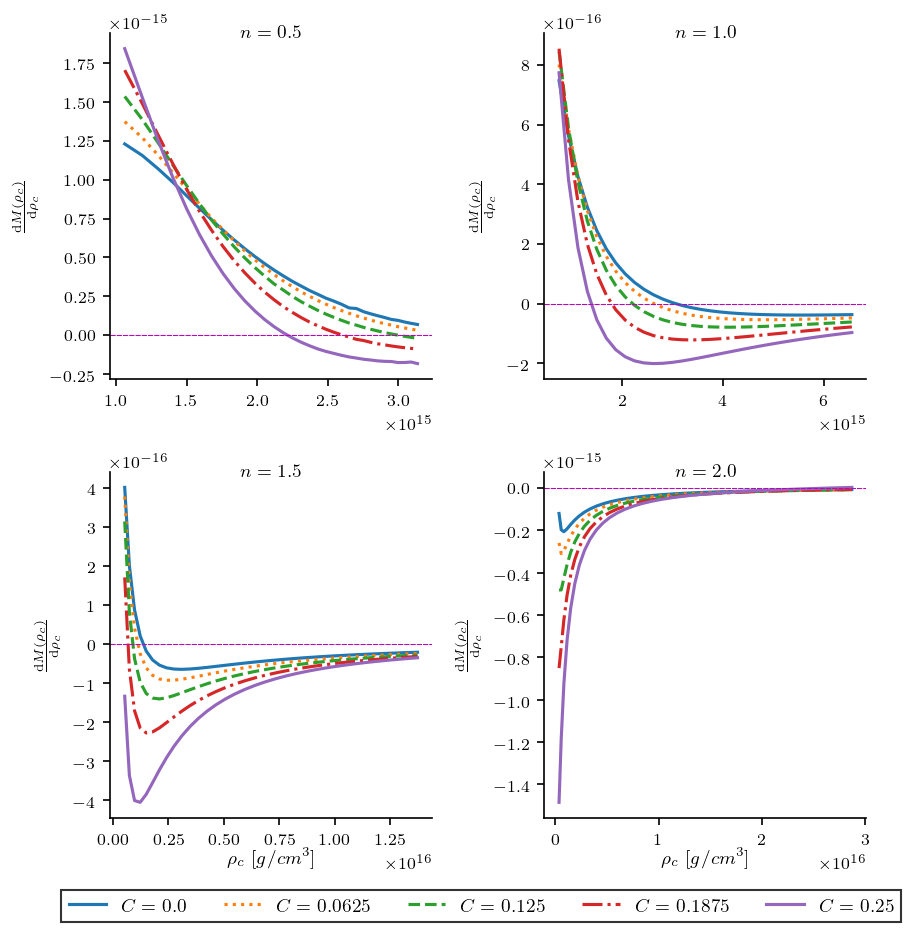

In [9]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False,figsize=(6,6),dpi=150)

for j in range(len(Lista_C)):
    
    # Diferenciación discreta de las soluciones obtenidas
    dmdrho0 = diff(Lista_M[0][j])/diff(Lista_Rho_c[0][j])
    Lista_Rho_c0 = Lista_Rho_c[0][j][:-1]
    
    dmdrho1 = diff(Lista_M[1][j])/diff(Lista_Rho_c[1][j])
    Lista_Rho_c1 = Lista_Rho_c[1][j][:-1]
    
    dmdrho2 = diff(Lista_M[2][j])/diff(Lista_Rho_c[2][j])
    Lista_Rho_c2 = Lista_Rho_c[2][j][:-1]
    
    dmdrho3 = diff(Lista_M[3][j])/diff(Lista_Rho_c[3][j])
    Lista_Rho_c3 = Lista_Rho_c[3][j][:-1]
    
    axes[0][0].plot(Lista_Rho_c0,dmdrho0,linestyle=LineStyles[j])
    axes[0][1].plot(Lista_Rho_c1,dmdrho1,linestyle=LineStyles[j])
    axes[1][0].plot(Lista_Rho_c2,dmdrho2,linestyle=LineStyles[j])
    axes[1][1].plot(Lista_Rho_c3,dmdrho3,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    
axes[0][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[0]),x=0.5,y=0.95,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')
axes[0][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[0][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[1]),x=0.5,y=0.95,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')
axes[0][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][0].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[2]),x=0.5,y=0.95,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')
axes[1][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][1].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[3]),x=0.5,y=0.95,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
axes[1][1].legend(ncol=5, loc=(-1.5,-0.3),fontsize=9,edgecolor='k',fancybox=False)

fig.tight_layout()

plt.show()

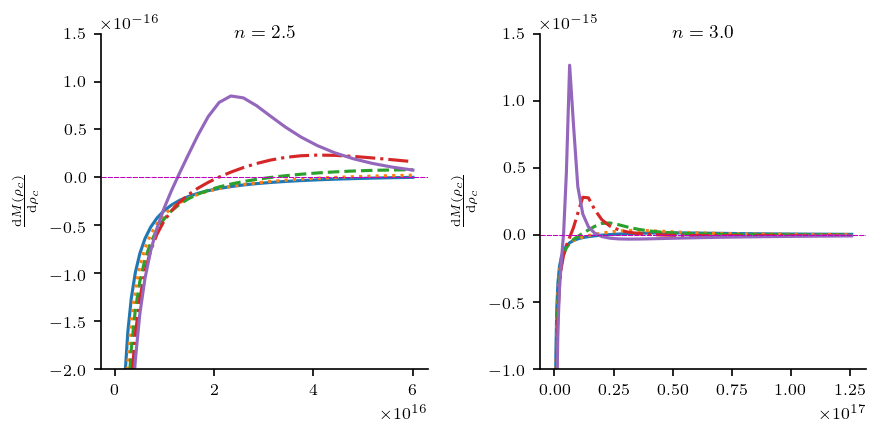

In [10]:
fig,(ax1, ax2) = plt.subplots(nrows=1,ncols=2,sharex=False,figsize=(6,3),dpi=150)

for j in range(len(Lista_C)):
    
    # Diferenciación discreta de las soluciones obtenidas
    dmdrho4 = diff(Lista_M[4][j])/diff(Lista_Rho_c[4][j])
    Lista_Rho_c4 = Lista_Rho_c[4][j][:-1]
    
    dmdrho5 = diff(Lista_M[5][j])/diff(Lista_Rho_c[5][j])
    Lista_Rho_c5 = Lista_Rho_c[5][j][:-1]
    
    ax1.plot(Lista_Rho_c4,dmdrho4,linestyle=LineStyles[j])
    ax2.plot(Lista_Rho_c5,dmdrho5,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    
ax1.set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
ax1.xaxis.set_label_coords(0.5,-0.0875)
ax1.set_ybound(-2*10**(-16),1.5*10**(-16))
ax1.set_title(r'$n = %.1f$'%(Lista_n[4]),x=0.5,y=0.95,fontsize=9)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

ax2.set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
ax2.xaxis.set_label_coords(0.5,-0.0875)
ax2.set_ybound(-1.0*10**(-15),1.5*10**(-15))
ax2.set_title(r'$n = %.1f$'%(Lista_n[5]),x=0.5,y=0.95,fontsize=9)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

fig.tight_layout()

plt.show()

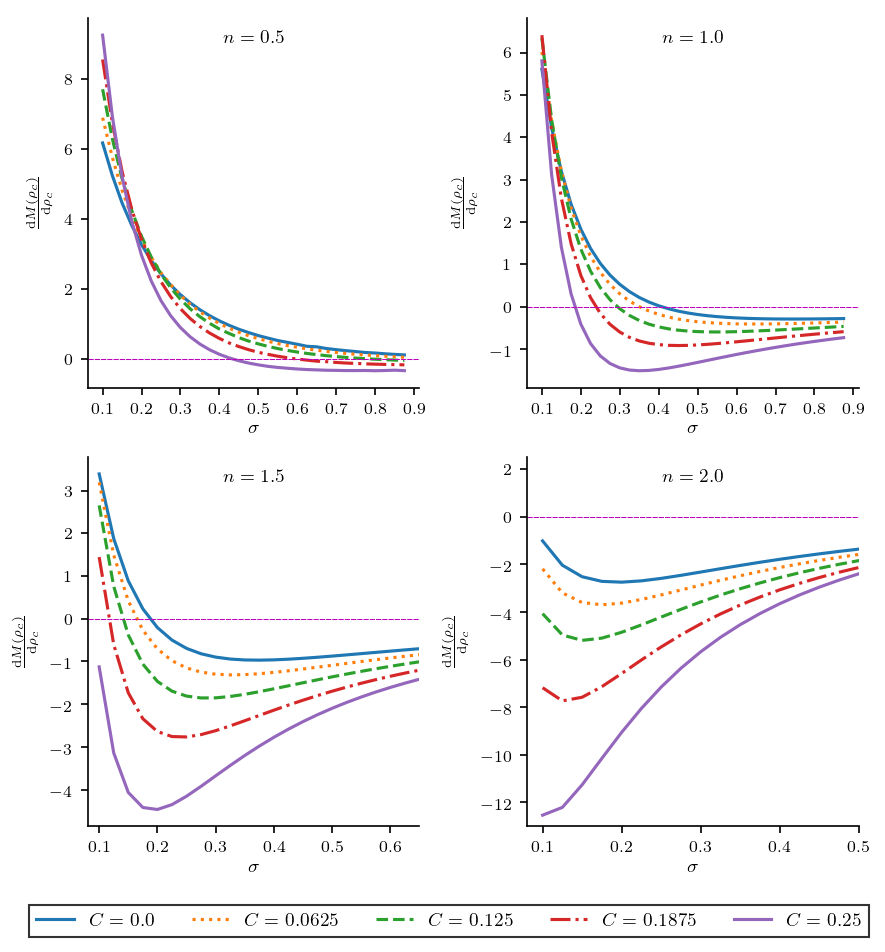

In [11]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(6,6),dpi=150)

for j in range(len(Lista_C)):
    
    # Diferenciación discreta de las soluciones obtenidas
    dmdrho0 = diff(Lista_M[0][j])/diff(Lista_sigma_m[0][j])
    Lista_sigma_m0 = Lista_sigma_m[0][j][:-1]
    
    dmdrho1 = diff(Lista_M[1][j])/diff(Lista_sigma_m[1][j])
    Lista_sigma_m1 = Lista_sigma_m[1][j][:-1]
    
    dmdrho2 = diff(Lista_M[2][j])/diff(Lista_sigma_m[2][j])
    Lista_sigma_m2 = Lista_sigma_m[2][j][:-1]
    
    dmdrho3 = diff(Lista_M[3][j])/diff(Lista_sigma_m[3][j])
    Lista_sigma_m3 = Lista_sigma_m[3][j][:-1]

    axes[0][0].plot(Lista_sigma_m0,dmdrho0,linestyle=LineStyles[j])
    axes[0][1].plot(Lista_sigma_m1,dmdrho1,linestyle=LineStyles[j])
    axes[1][0].plot(Lista_sigma_m2,dmdrho2,linestyle=LineStyles[j])
    axes[1][1].plot(Lista_sigma_m3,dmdrho3,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))

axes[0][0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[0][0].set_xlabel(r'$\sigma$',fontsize=9)
axes[0][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[0]),x=0.5,y=0.9,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')
axes[0][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[0][1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[0][1].set_xlabel(r'$\sigma$',fontsize=9)
axes[0][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[1]),x=0.5,y=0.9,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')
axes[0][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[1][0].set_xlabel(r'$\sigma$',fontsize=9)
axes[1][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][0].set_xbound(0.08,0.65)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[2]),x=0.5,y=0.9,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')
axes[1][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[1][1].set_xlabel(r'$\sigma$',fontsize=9)
axes[1][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][1].set_xbound(0.08,0.5)
axes[1][1].set_ybound(-13.0,2.5)
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[3]),x=0.5,y=0.9,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
axes[1][1].legend(ncol=5, loc=(-1.5,-0.3),fontsize=9,edgecolor='k',fancybox=False)

fig.tight_layout()

plt.show()

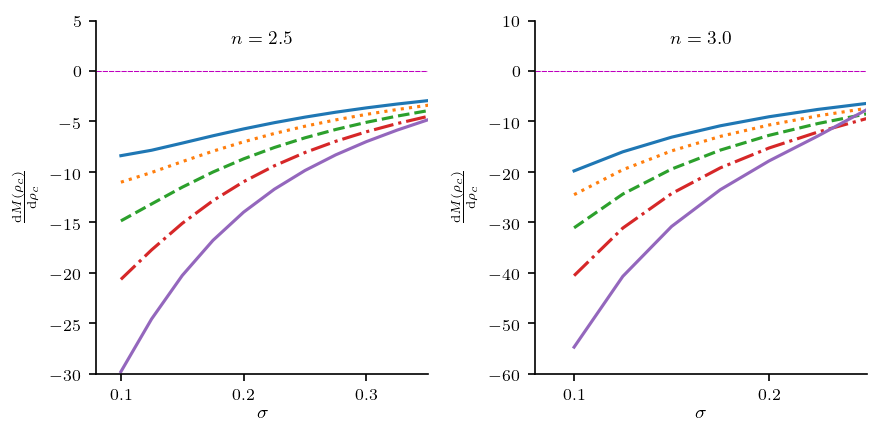

In [12]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(6,3),dpi=150)

for j in range(len(Lista_C)):
    
    # Diferenciación discreta de las soluciones obtenidas
    dmdrho4 = diff(Lista_M[4][j])/diff(Lista_sigma_m[4][j])
    Lista_sigma_m4 = Lista_sigma_m[4][j][:-1]
    
    dmdrho5 = diff(Lista_M[5][j])/diff(Lista_sigma_m[5][j])
    Lista_sigma_m5 = Lista_sigma_m[5][j][:-1]
    
    ax1.plot(Lista_sigma_m4,dmdrho4,linestyle=LineStyles[j])
    ax2.plot(Lista_sigma_m5,dmdrho5,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    
ax1.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax1.set_xlabel(r'$\sigma$',fontsize=9)
ax1.set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
ax1.set_xbound(0.08,0.35)
ax1.set_ybound(-30,5)
ax1.xaxis.set_label_coords(0.5,-0.0875)
ax1.set_title(r'$n = %.1f$'%(Lista_n[4]),x=0.5,y=0.9,fontsize=9)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

ax2.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax2.set_xlabel(r'$\sigma$',fontsize=9)
ax2.set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
ax2.set_xbound(0.08,0.25)
ax2.set_ybound(-60,10)
ax2.xaxis.set_label_coords(0.5,-0.0875)
ax2.set_title(r'$n = %.1f$'%(Lista_n[5]),x=0.5,y=0.9,fontsize=9)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

fig.tight_layout()

plt.show()

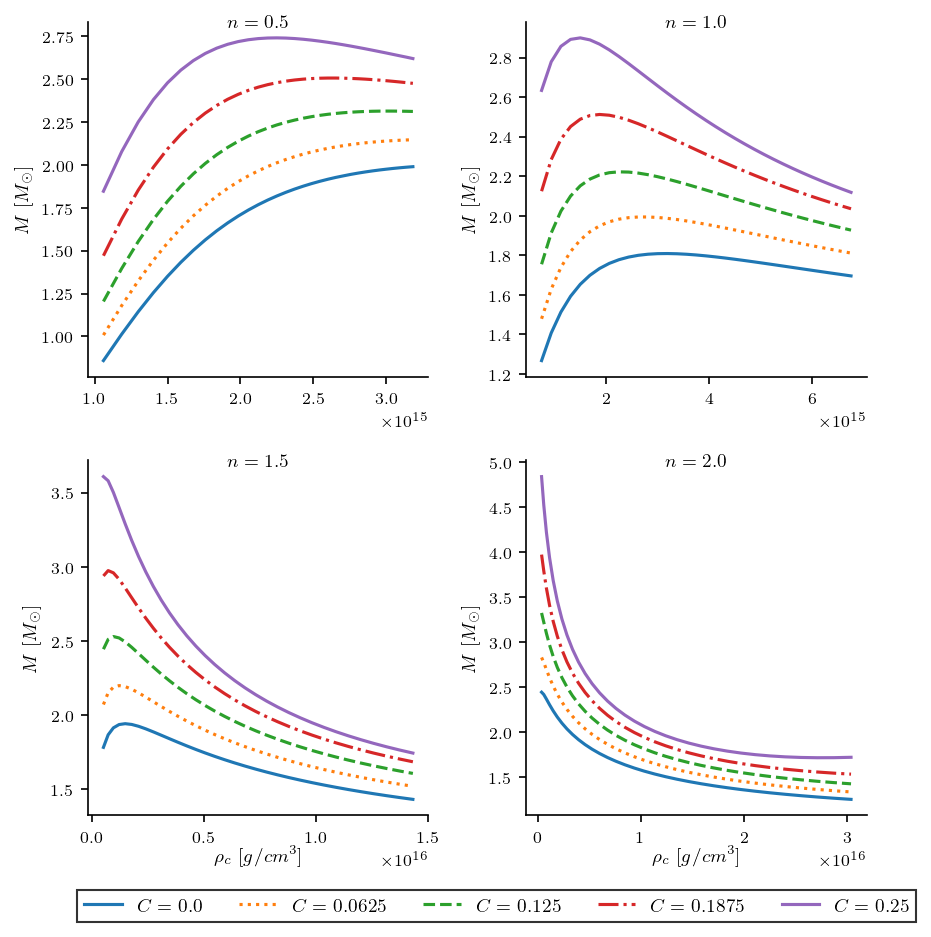

In [13]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False,figsize=(6,6),dpi=150)

for j in range(len(Lista_C)):
    
    axes[0][0].plot(Lista_Rho_c[0][j],Lista_M[0][j],linestyle=LineStyles[j])
    axes[0][1].plot(Lista_Rho_c[1][j],Lista_M[1][j],linestyle=LineStyles[j])
    axes[1][0].plot(Lista_Rho_c[2][j],Lista_M[2][j],linestyle=LineStyles[j])
    axes[1][1].plot(Lista_Rho_c[3][j],Lista_M[3][j],linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    
axes[0][0].set_ylabel(r'$M \, \, [M_{\odot}]$',fontsize=9)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[0]),x=0.5,y=0.95,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')

axes[0][1].set_ylabel(r'$M \, \, [M_{\odot}]$',fontsize=9)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[1]),x=0.5,y=0.95,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')

axes[1][0].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][0].set_ylabel(r'$M \, \, [M_{\odot}]$',fontsize=9)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[2]),x=0.5,y=0.95,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')

axes[1][1].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][1].set_ylabel(r'$M \, \, [M_{\odot}]$',fontsize=9)
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[3]),x=0.5,y=0.95,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].legend(ncol=5, loc=(-1.32,-0.3),fontsize=9,edgecolor='k',fancybox=False)

fig.tight_layout()

plt.show()